In [69]:
%matplotlib inline

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [124]:
scores = pd.read_csv('regular_season_scores_20160922.csv')
#remove seeds from team names
scores['home'] = scores['home'].apply(lambda x: str(x).split('(')[0])
scores['away'] = scores['away'].apply(lambda x: str(x).split('(')[0])
#remove games from cancelled tournaments => teamname is 'nan'
scores = scores[scores['home'] != 'nan']
scores = scores[scores['away'] != 'nan']
###start with only mens games
scores = scores[scores['div'] == 'Men']

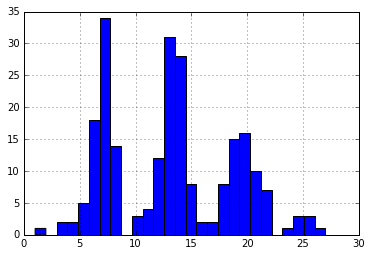

In [137]:
allgames = pd.concat([scores['home'], scores['away']])
numgames = pd.value_counts(allgames)
rankedteams = numgames[numgames >= 10].index
plt.show(numgames.hist(bins=max(numgames)))
#tempscores = scores.copy(deep=True)
#while min(numgames) < 10:
#    tempscores = tempscores[tempscores['home'].isin(rankedteams) & tempscores['away'].isin(rankedteams)]
#    allgames = pd.concat([tempscores['home'], tempscores['away']])
#    numgames = pd.value_counts(allgames)
#    rankedteams = numgames[numgames >= 10].index
#    print 'teams removed = {}'.format(sum(numgames < 10))

In [180]:
scores = scores[~scores['homescore'].isin(['W','L','F'])]
scores = scores[~scores['awayscore'].isin(['W','L','F'])]
scores[['homescore','awayscore']] = scores[['homescore','awayscore']].astype(int)

#print scores[['homescore', 'awayscore']].apply(sum, axis=1)
#scores = scores[scores[['homescore', 'awayscore']].apply(sum) > 0]

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
38      18
39      20
40      18
107     16
108     23
        ..
3659    17
3660    16
3661    23
3662    19
3663    19
3664    19
3665    16
3666    21
3667    19
3668    20
3669    28
3670    23
3671    27
3672    27
3673    21
3674    19
3675    24
3678    28
3679    25
3680    23
3681    19
3682    29
3683    23
3684    22
3685    23
3686    27
3687    27
3689    17
3690    21
3691    21
dtype: int64


In [171]:
def createGraph(tourneyScores):
    gameResults = pd.DataFrame()
    winnerBool = tourneyScores['homescore'] > tourneyScores['awayscore']
    gameResults['winner'] = pd.concat([tourneyScores.loc[winnerBool, 'home'], tourneyScores.loc[~winnerBool, 'away']])
    gameResults['loser'] = pd.concat([tourneyScores.loc[winnerBool,'away'], tourneyScores.loc[~winnerBool, 'home']])
    graph = nx.from_pandas_dataframe(gameResults, source='loser', target='winner', create_using=nx.MultiDiGraph())
    return graph

In [172]:
graph = createGraph(scores)
#nx.write_graphml(graph, 'mens_games')
#nx.draw(graph)
#plt.draw()

In [ ]:
nxscores = scores[['awayscore','homescore','home','away']]
nxscores['winner'] = scores['home'] = scores['home'].apply(lambda x: str(x).split('(')[0])
scores['away'] = scores['away'].apply(lambda x: str(x).split('(')[0])
scores = scores[scores['home'] != 'nan']
scores = scores[scores['away'] != 'nan']
nxscores['loser'] = 
season_graph = nx.from_pandas_dataframe(nxscores, source='loser', target='winner', create_using=nx.MultiDiGraph())

In [ ]:
scores = scores[~scores['homescore'].isin(['W','L','F'])]
scores = scores[~scores['awayscore'].isin(['W','L','F'])]

In [78]:
menscores = scores[scores['div'] == 'Men']
womenscores = scores[scores['div'] == 'Women']
mixedscores = scores[scores['div'] == 'Mixed']
men_teams = pd.concat([menscores['home'], menscores['away']], axis=0)

pandas.core.series.Series